In [63]:
from os import path

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
import umap.umap_ as umap

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

In [51]:
df = pd.read_csv('data/raw/Adequecy2.csv', encoding='cp874')

In [52]:
df

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027
...,...,...,...,...,...,...,...
72,อำนาจเจริญ,1371,65212,802,198,3030.965035,569.780822
73,อุดรธานี,6330,288957,3727,651,13314.164340,2557.063014
74,อุตรดิตถ์,2398,105086,1130,351,3310.944056,802.128767
75,อุทัยธานี,1493,71108,905,156,3659.909091,608.221918


In [ ]:
df["x1_staff_per_elderly"] = df["staff_total"] / df["elderly"]
df["x2_hospital_per_elderly"] = df["hospital_gold"] / df["elderly"]
df["x3_equipment_per_elderly"] = df["equipment_total"] / df["elderly"]
df["x4_visits_per_elderly"] = (df["ipd"]) / df["elderly"]
# df[["x1_staff_per_elderly","x2_hospital_per_elderly","x3_equipment_per_elderly","x4_visits_per_elderly"]]

cols = ["x1_staff_per_elderly","x2_hospital_per_elderly",
        "x3_equipment_per_elderly","x4_visits_per_elderly"]

X = df[cols].values

# --- Z-score ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=cols, index=df.index)

df_scaled

,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,x4_visits_per_elderly
0,3.944894,-1.608731,3.218146,2.064127
1,0.595917,1.436616,0.817901,0.997329
2,-0.840867,-1.180038,-0.503684,-0.264208
3,-0.688221,1.075696,-0.603697,-0.356643
4,-1.606241,-0.827096,-2.109597,-1.746436
...,...,...,...,...
72,-0.364170,1.368581,-0.313925,-0.009041
73,-0.235990,-0.002979,-0.142915,0.041812
74,-0.103395,1.900645,-0.754522,-0.510777
75,-0.368165,-0.106433,-0.191670,-0.092581


In [54]:
data_list = df_scaled.round(3).values.tolist()
data_list

[[3.945, -1.609, 3.218, 2.064],
 [0.596, 1.437, 0.818, 0.997],
 [-0.841, -1.18, -0.504, -0.264],
 [-0.688, 1.076, -0.604, -0.357],
 [-1.606, -0.827, -2.11, -1.746],
 [0.946, -0.328, 0.549, 1.044],
 [2.25, 0.874, 2.285, 2.279],
 [0.094, -0.887, 0.429, 0.375],
 [1.82, -0.475, 2.052, 1.332],
 [-0.084, 0.018, -0.372, -0.296],
 [-1.01, 0.877, -0.503, -0.947],
 [0.792, 0.048, 1.265, 1.969],
 [-0.571, 0.222, -0.695, -0.872],
 [0.746, -0.584, 1.093, 0.858],
 [0.83, 0.656, 0.615, 0.651],
 [0.731, 0.522, 1.117, 0.845],
 [-0.529, -0.56, -0.357, -0.133],
 [3.547, 0.458, 3.403, 3.422],
 [0.446, -0.891, 0.383, -0.319],
 [-0.685, 0.561, -0.495, -0.591],
 [-0.478, -1.059, -0.353, -0.433],
 [0.038, 0.878, 0.512, 0.527],
 [-0.518, -0.434, -0.751, -0.632],
 [0.739, -1.183, 0.345, -0.475],
 [-0.127, -0.12, -0.24, 0.109],
 [-0.279, -0.094, -0.569, -0.445],
 [-1.165, -0.569, -1.0, -1.143],
 [-0.485, -0.106, -0.347, -0.109],
 [0.102, -1.475, 0.105, 0.043],
 [-0.459, -1.244, 0.213, 0.103],
 [-0.557, -0.809, -

array([[<Axes: title={'center': 'x1_staff_per_elderly'}>,
        <Axes: title={'center': 'x2_hospital_per_elderly'}>],
       [<Axes: title={'center': 'x3_equipment_per_elderly'}>,
        <Axes: title={'center': 'x4_visits_per_elderly'}>]], dtype=object)

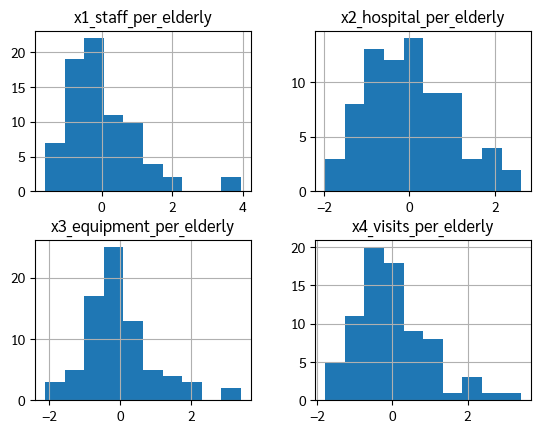

In [55]:
df_scaled.hist()

In [56]:
df_new = pd.concat([df, df_scaled.add_prefix("z_")], axis=1)
df_new

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,x4_visits_per_elderly,z_x1_staff_per_elderly,z_x2_hospital_per_elderly,z_x3_equipment_per_elderly,z_x4_visits_per_elderly
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050,0.050695,0.001336,0.024686,0.013300,3.944894,-1.608731,3.218146,2.064127
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000,0.027635,0.003075,0.016268,0.010952,0.595917,1.436616,0.817901,0.997329
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438,0.017741,0.001581,0.011633,0.008176,-0.840867,-1.180038,-0.503684,-0.264208
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438,0.018792,0.002869,0.011282,0.007972,-0.688221,1.075696,-0.603697,-0.356643
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027,0.012471,0.001782,0.006001,0.004913,-1.606241,-0.827096,-2.109597,-1.746436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,อำนาจเจริญ,1371,65212,802,198,3030.965035,569.780822,0.021024,0.003036,0.012298,0.008737,-0.364170,1.368581,-0.313925,-0.009041
73,อุดรธานี,6330,288957,3727,651,13314.164340,2557.063014,0.021906,0.002253,0.012898,0.008849,-0.235990,-0.002979,-0.142915,0.041812
74,อุตรดิตถ์,2398,105086,1130,351,3310.944056,802.128767,0.022819,0.003340,0.010753,0.007633,-0.103395,1.900645,-0.754522,-0.510777
75,อุทัยธานี,1493,71108,905,156,3659.909091,608.221918,0.020996,0.002194,0.012727,0.008553,-0.368165,-0.106433,-0.191670,-0.092581


## LLM label 

In [131]:
gpt5   = [2,2,0,1,0,1,2,1,2,1,1,1,1,1,2,2,0,2,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,2,1,0,0,0,0,1,2,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,2,0,0,0,0,2,0,0,2,0,0,0,2,1,1,2,1,0,1,1]
claude = [2,1,1,1,0,1,2,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,2,1,0,1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,2,0,0,2,1,1,0,1,1,1,1,1,1]
gemini = [2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0]  # จาก Gemini
grok =   [2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0]
deepseek  = [2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0]

label = pd.DataFrame({
    "GPT5": gpt5,
    "Claude": claude,
    "Gemini": gemini,
    "Grok": grok,
    "deepseek": deepseek
})

final_labels = []

for i in range(len(label)):
    votes = label.iloc[i].values
    cnt = Counter(votes)
    
    # เอาค่า top 2 count มาดูว่าเสมอกันไหม
    top_counts = cnt.most_common()
    
    # ถ้าค่า count มากสุด tie กับตัวรอง → ถือว่า tie
    if len(top_counts) > 1 and top_counts[0][1] == top_counts[1][1]:
        final_labels.append(1)   # tie-break → moderate
    else:
        final_labels.append(top_counts[0][0])  # normal majority vote

label["Final"] = final_labels


In [132]:
df_labeling = df_new.copy()
df_labeling["GPT5"]     = gpt5
df_labeling["Claude"]   = claude
df_labeling["Gemini"]   = gemini
df_labeling["Grok"]     = grok
df_labeling["DeepSeek"] = deepseek
df_labeling["Final"]    = final_labels
df_labeling.head()

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,...,z_x1_staff_per_elderly,z_x2_hospital_per_elderly,z_x3_equipment_per_elderly,z_x4_visits_per_elderly,GPT5,Claude,Gemini,Grok,DeepSeek,Final
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050,0.050695,0.001336,0.024686,...,3.944894,-1.608731,3.218146,2.064127,2,2,2,2,2,2
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000,0.027635,0.003075,0.016268,...,0.595917,1.436616,0.817901,0.997329,2,1,2,1,1,1
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438,0.017741,0.001581,0.011633,...,-0.840867,-1.180038,-0.503684,-0.264208,0,1,0,0,0,0
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438,0.018792,0.002869,0.011282,...,-0.688221,1.075696,-0.603697,-0.356643,1,1,1,1,1,1
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027,0.012471,0.001782,0.006001,...,-1.606241,-0.827096,-2.109597,-1.746436,0,0,0,0,0,0


In [133]:
df_labeling.columns

Index(['จังหวัด', 'staff_total', 'elderly', 'equipment_total', 'hospital_gold',
       'opd', 'ipd', 'x1_staff_per_elderly', 'x2_hospital_per_elderly',
       'x3_equipment_per_elderly', 'x4_visits_per_elderly',
       'z_x1_staff_per_elderly', 'z_x2_hospital_per_elderly',
       'z_x3_equipment_per_elderly', 'z_x4_visits_per_elderly', 'GPT5',
       'Claude', 'Gemini', 'Grok', 'DeepSeek', 'Final'],
      dtype='object')

In [140]:
import plotly.graph_objects as go
import numpy as np

llm_cols = ["GPT5","Claude","Gemini","Grok","DeepSeek","Final"]
heatmap_matrix = df_labeling[llm_cols].values
province_names = df_labeling["จังหวัด"].tolist()

# --- Heatmap ---
fig = go.Figure(data=go.Heatmap(
    z=heatmap_matrix,
    x=llm_cols,
    y=province_names,
    colorscale="Viridis",
    showscale=True,
    zmin=0, zmax=2,
    colorbar=dict(title="Label<br>(0–2)")
))

# --- Add grid lines using shapes ---
shapes = []

n_rows = len(province_names)
n_cols = len(llm_cols)

# horizontal grid
for i in range(n_rows + 1):
    shapes.append(
        dict(
            type="line",
            x0=-0.5, y0=i-0.5,
            x1=n_cols-0.5, y1=i-0.5,
            line=dict(color="white", width=0.5)
        )
    )

# vertical grid
for j in range(n_cols + 1):
    shapes.append(
        dict(
            type="line",
            x0=j-0.5, y0=-0.5,
            x1=j-0.5, y1=n_rows-0.5,
            line=dict(color="white", width=0.5)
        )
    )

fig.update_layout(
    title="LLM Label Agreement Heatmap",
    width=900,
    height=1200,
    template="plotly_white",
    shapes=shapes,
    xaxis=dict(tickangle=45),
)

fig.show()


In [ ]:
df_labeling.columns

Index(['จังหวัด', 'staff_total', 'elderly', 'equipment_total', 'hospital_gold',
       'opd', 'ipd', 'x1_staff_per_elderly', 'x2_hospital_per_elderly',
       'x3_equipment_per_elderly', 'x4_visits_per_elderly',
       'z_x1_staff_per_elderly', 'z_x2_hospital_per_elderly',
       'z_x3_equipment_per_elderly', 'z_x4_visits_per_elderly', 'GPT5',
       'Claude', 'Gemini', 'Grok', 'DeepSeek', 'Final'],
      dtype='object')

## EDA label

In [142]:
color_map = {
    "Low": "#440457",        # พร้อมน้อย
    "Moderate": "#228f8b",   # พร้อมกลาง
    "High": "#f9e844"        # พร้อมมาก
}

In [143]:
import umap.umap_ as umap
import pandas as pd
import plotly.express as px

# ฟีเจอร์ z-score ที่ใช้ลด dimension
features = [
    "z_x1_staff_per_elderly",
    "z_x2_hospital_per_elderly",
    "z_x3_equipment_per_elderly",
    "z_x4_visits_per_elderly"
]

X = df_labeling[features].values
df_labeling.loc[df_labeling["จังหวัด"] == "สมุทรสาคร", "Final"] = 2
df_labeling[df_labeling['จังหวัด'] == 'สมุทรสาคร'] 

umap_model = umap.UMAP(
    n_neighbors=10,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)

X_umap = umap_model.fit_transform(X)
df_umap = df_labeling.copy()
df_umap["UMAP1"] = X_umap[:,0]
df_umap["UMAP2"] = X_umap[:,1]
df_umap["label_str"] = df_umap["Final"].map({
    0: "Low",
    1: "Moderate",
    2: "High"
})
fig = px.scatter(
    df_umap,
    x="UMAP1",
    y="UMAP2",
    color="label_str",
    color_discrete_map=color_map,
    hover_name="จังหวัด",
    hover_data={
        "staff_total": True,
        "equipment_total": True,
        "hospital_gold": True,
        "elderly": True,
        "ipd": True,
        "x1_staff_per_elderly": True,
        "x2_hospital_per_elderly": True,
        "x3_equipment_per_elderly": True,
        "x4_visits_per_elderly": True,
        "z_x1_staff_per_elderly": True,
        "z_x2_hospital_per_elderly": True,
        "z_x3_equipment_per_elderly": True,
        "z_x4_visits_per_elderly": True,
        "GPT5": True,
        "Claude": True,
        "Gemini": True,
        "Grok": True,
        "DeepSeek": True,
        "Final": True,
    },
    title="UMAP Projection Colored by LLM Readiness Labels"
)

fig.update_traces(marker=dict(size=11, opacity=0.92,
                              line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(
    width=1000, 
    height=800, 
    template="plotly_white"
)

fig.show()


d:\mini\envs\pine\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [144]:
df_umap['Final'].value_counts()

Final
1    37
0    32
2     8
Name: count, dtype: int64

In [145]:
color_map = {
    0: "#440457",   # น้อย
    1: "#228f8b",   # กลาง
    2: "#f9e844"    # มาก
}

In [146]:
import plotly.express as px

for f in features:
    fig = px.box(
        df_labeling,
        x="Final",
        y=f,
        color="Final",
        color_discrete_map=color_map,
        title=f"Distribution of {f} by Label"
    )
    fig.update_layout(height=500, width=700)
    fig.show()


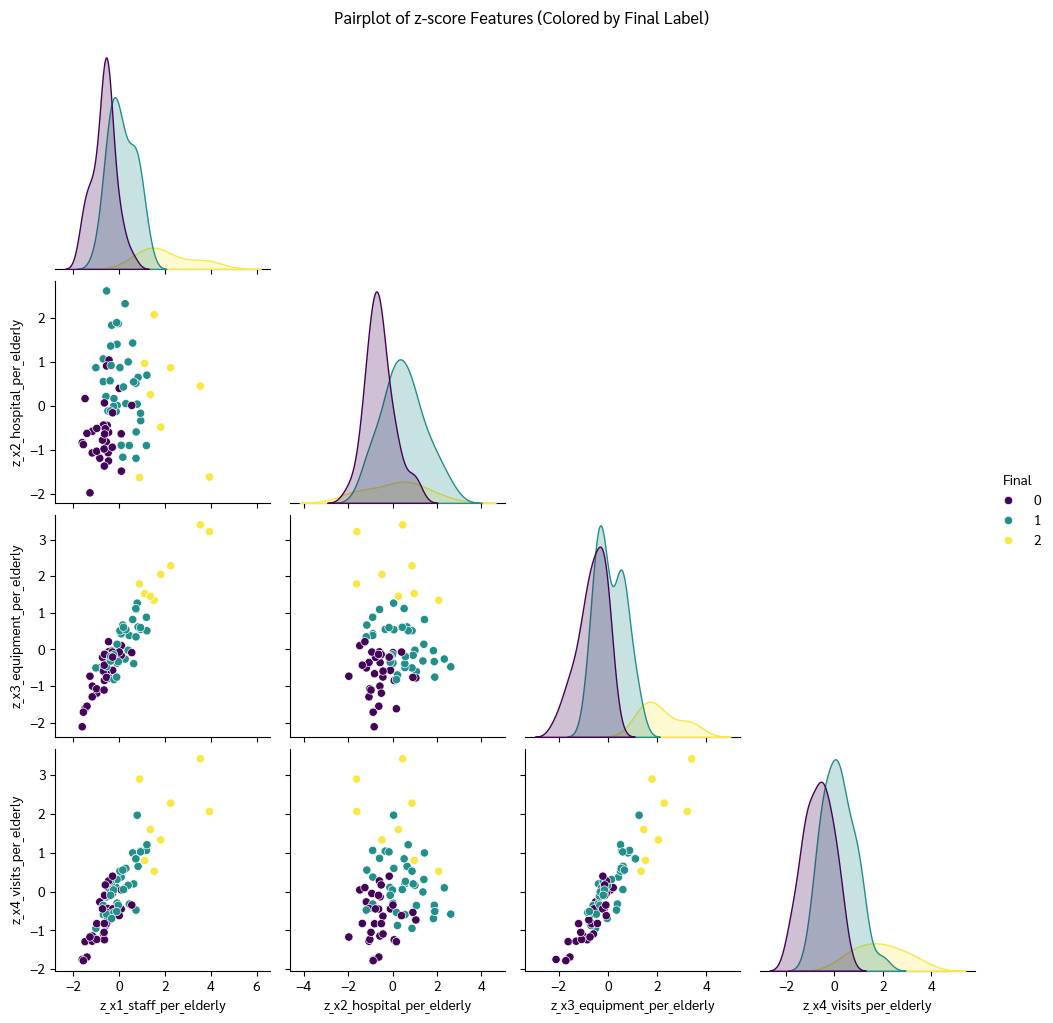

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# เตรียมสี
pairplot_palette = {
    0: "#440457",
    1: "#228f8b",
    2: "#f9e844"
}

sns.pairplot(
    df_labeling[
        ["Final"] +
        [
            "z_x1_staff_per_elderly",
            "z_x2_hospital_per_elderly",
            "z_x3_equipment_per_elderly",
            "z_x4_visits_per_elderly"
        ]
    ],
    hue="Final",
    palette=pairplot_palette,
    corner=True,
    diag_kind="kde"
)

plt.suptitle("Pairplot of z-score Features (Colored by Final Label)", y=1.02)
plt.show()


## PCA

In [ ]:
df["x1_staff_per_elderly"] = df["staff_total"] / df["elderly"]
df["x2_hospital_per_elderly"] = df["hospital_gold"] / df["elderly"]
df["x3_equipment_per_elderly"] = df["equipment_total"] / df["elderly"]
df["x4_visits_per_elderly"] = (df["ipd"]) / df["elderly"]

X = df[["x1_staff_per_elderly","x2_hospital_per_elderly","x3_equipment_per_elderly","x4_visits_per_elderly"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    "KMeans (k=2)": KMeans(n_clusters=2, random_state=42, n_init="auto").fit_predict(X_scaled),
    "KMeans (k=3)": KMeans(n_clusters=3, random_state=42, n_init="auto").fit_predict(X_scaled),
    "GMM (k=2)": GaussianMixture(n_components=2, random_state=42).fit_predict(X_scaled),
    "GMM (k=3)": GaussianMixture(n_components=3, random_state=42).fit_predict(X_scaled),
    "DBSCAN (default)": DBSCAN().fit_predict(X_scaled),
    "DBSCAN (tuned eps=0.8, min_samples=3)": DBSCAN(eps=0.8, min_samples=3).fit_predict(X_scaled)
}

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"], df["pca2"] = X_pca[:,0], X_pca[:,1]

titles = list(models.keys())
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=titles)
positions = [(1,1),(1,2),(2,1),(2,2),(3,1),(3,2)]
color_map = {
    "0": "#1f77b4",   # ฟ้า
    "1": "#ff7f0e",   # ส้ม
    "2": "#2ca02c",   # เขียว
    "Outlier": "#7f7f7f"  # เทา
}



In [44]:
for (name, cluster), pos in zip(models.items(), positions):
    df["cluster"] = cluster
    df["cluster_label"] = df["cluster"].astype(str)
    df["cluster_label"] = df["cluster_label"].replace("-1", "Outlier")

    for cl in sorted(df["cluster_label"].unique(), key=lambda x: str(x)):
        subset = df[df["cluster_label"] == cl]
        fig.add_trace(
            go.Scatter(
                x=subset["pca1"], y=subset["pca2"],
                mode="markers",
                name=f"{name} - {cl}",
                marker=dict(
                    size=8,
                    color=color_map.get(str(cl), "#d3d3d3"),  # 👈 fixed color
                    line=dict(width=0.5, color="black")
                ),
                hovertemplate=(
                    "<b>%{customdata[0]}</b><br>"
                    "staff_total: %{customdata[1]}<br>"
                    "elderly: %{customdata[2]}<br>"
                    "equipment_total: %{customdata[3]}<br>"
                    "hospital_gold: %{customdata[4]}<br>"
                    "opd: %{customdata[5]}<br>"
                    "ipd: %{customdata[6]}<br>"
                    "cluster: %{customdata[7]}"
                ),
                customdata=np.stack([
                    subset["จังหวัด"],
                    subset["staff_total"],
                    subset["elderly"],
                    subset["equipment_total"],
                    subset["hospital_gold"],
                    subset["opd"],
                    subset["ipd"],
                    subset["cluster_label"]
                ], axis=-1)
            ),
            row=pos[0], col=pos[1]
        )


# --- Layout ---
fig.update_layout(
    width=1300, height=1500,
    title="Comparative Clustering of Thai Provinces (KMeans / GMM / DBSCAN)",
    template="plotly_white",
    showlegend=False
)
fig.update_xaxes(title="PCA1")
fig.update_yaxes(title="PCA2")

fig.show()
# pio.write_html(fig, file="cluster_comparison.html", auto_open=False)



## UMAP

In [ ]:
df["x1_staff_per_elderly"] = df["staff_total"] / df["elderly"]
df["x2_hospital_per_elderly"] = df["hospital_gold"] / df["elderly"]
df["x3_equipment_per_elderly"] = df["equipment_total"] / df["elderly"]
df["x4_visits_per_elderly"] = df["ipd"] / df["elderly"]

X = df[[
    "x1_staff_per_elderly",
    "x2_hospital_per_elderly",
    "x3_equipment_per_elderly",
    "x4_visits_per_elderly"
]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    "KMeans (k=2)": KMeans(n_clusters=2, random_state=42, n_init="auto").fit_predict(X_scaled),
    "KMeans (k=3)": KMeans(n_clusters=3, random_state=42, n_init="auto").fit_predict(X_scaled),
    "GMM (k=2)": GaussianMixture(n_components=2, random_state=42).fit_predict(X_scaled),
    "GMM (k=3)": GaussianMixture(n_components=3, random_state=42).fit_predict(X_scaled),
    "DBSCAN (default)": DBSCAN().fit_predict(X_scaled),
    "DBSCAN (tuned eps=0.8, min_samples=3)": DBSCAN(eps=0.8, min_samples=3).fit_predict(X_scaled)
}

umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
df["umap1"], df["umap2"] = X_umap[:, 0], X_umap[:, 1]



d:\mini\envs\pine\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\mini\envs\pine\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "d:\mini\envs\pine\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "d:\mini\envs\pine\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    

In [ ]:
color_map = {
    "0": "#1f77b4",   
    "1": "#ff7f0e",  
    "2": "#2ca02c",   
    "Outlier": "#7f7f7f" 
}

In [ ]:
titles = list(models.keys())
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=titles)
positions = [(1,1),(1,2),(2,1),(2,2),(3,1),(3,2)]

for (name, cluster), pos in zip(models.items(), positions):
    df["cluster"] = cluster
    df["cluster_label"] = df["cluster"].astype(str).replace("-1", "Outlier")

    for cl in sorted(df["cluster_label"].unique(), key=lambda x: str(x)):
        subset = df[df["cluster_label"] == cl]
        fig.add_trace(
            go.Scatter(
                x=subset["umap1"], y=subset["umap2"],
                mode="markers",
                name=f"{name} - {cl}",
                marker=dict(
                    size=8,
                    color=color_map.get(str(cl), "#d3d3d3"),
                    line=dict(width=0.5, color="black")
                ),
                hovertemplate=(
                    "<b>%{customdata[0]}</b><br>"
                    "staff_total: %{customdata[1]}<br>"
                    "elderly: %{customdata[2]}<br>"
                    "equipment_total: %{customdata[3]}<br>"
                    "hospital_gold: %{customdata[4]}<br>"
                    "ipd: %{customdata[5]}<br>"
                    "cluster: %{customdata[6]}"
                ),
                customdata=np.stack([
                    subset["จังหวัด"],
                    subset["staff_total"],
                    subset["elderly"],
                    subset["equipment_total"],
                    subset["hospital_gold"],
                    subset["ipd"],
                    subset["cluster_label"]
                ], axis=-1)
            ),
            row=pos[0], col=pos[1]
        )

fig.update_layout(
    width=1300, height=1500,
    title="Comparative Clustering of Thai Provinces (KMeans / GMM / DBSCAN using UMAP)",
    template="plotly_white",
    showlegend=False
)
fig.update_xaxes(title="UMAP1")
fig.update_yaxes(title="UMAP2")

fig.show()


## ---

## Agg k = 4

In [243]:
df = pd.read_csv('data/raw/Adequecy2.csv', encoding='cp874')

df["x1_staff_per_elderly"] = df["staff_total"] / df["elderly"]
df["x2_hospital_per_elderly"] = df["hospital_gold"] / (df["elderly"])
df["x3_equipment_per_elderly"] = df["equipment_total"] / df["elderly"]
df["x4_visits_per_elderly"] = (df["ipd"]) / df["elderly"]
X_raw = df[["x1_staff_per_elderly","x2_hospital_per_elderly","x3_equipment_per_elderly","x4_visits_per_elderly"]].values


In [244]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [245]:
umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
df["umap1"], df["umap2"] = X_umap[:, 0], X_umap[:, 1]

fig = px.scatter(
    df,
    x="umap1", y="umap2",
    hover_name="จังหวัด",
    hover_data={
        "staff_total": True,
        "elderly": True,
        "equipment_total": True,
        "hospital_gold": True,
        "ipd": True,
    },
    title="UMAP plot",
    color_discrete_sequence=['gray']
)


fig.update_traces(marker=dict(size=10, line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(
    width=950, height=600,
    template="plotly_white",
)

fig.show()


d:\mini\envs\pine\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



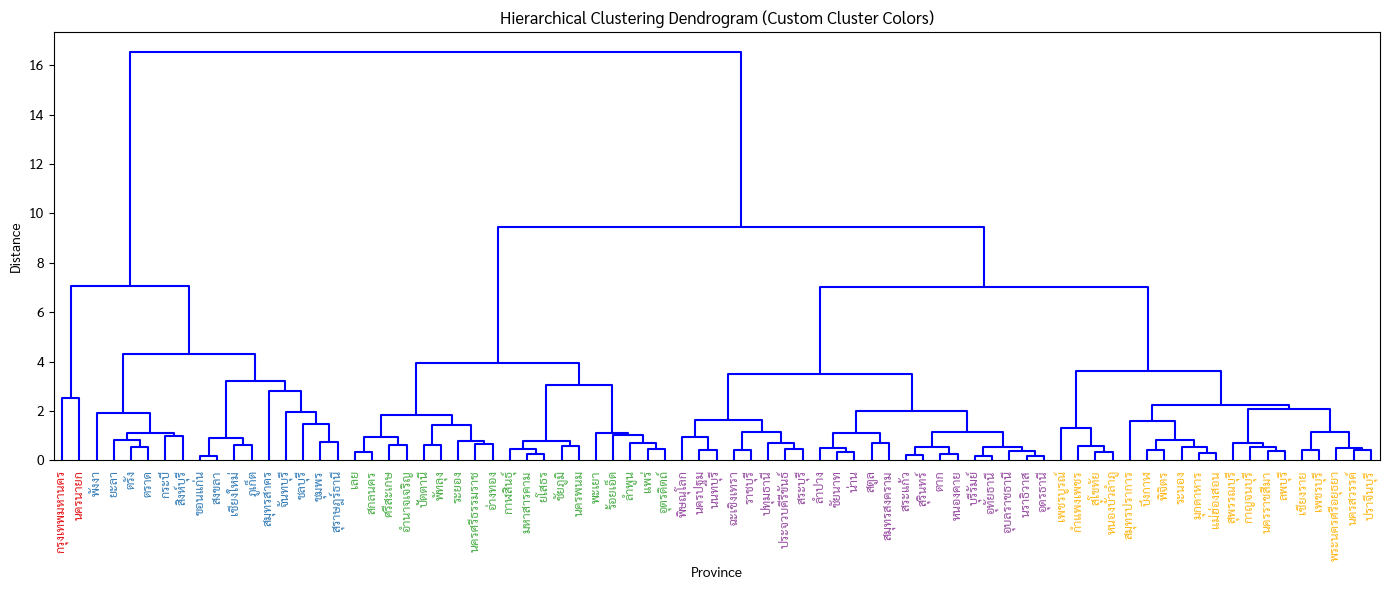

In [246]:
linkage_matrix = linkage(X_scaled, method="ward")
clusters = fcluster(linkage_matrix, t=6.5, criterion="distance")
df["cluster"] = clusters

cluster_colors = {
    1: "#e41a1c",   
    2: "#377eb8",  
    3: "#4daf4a",  
    4: "#984ea3", 
    5: "#ffb81c",  
    }

plt.figure(figsize=(14, 6))
dn = dendrogram(
    linkage_matrix,
    labels=df["จังหวัด"].values,
    leaf_rotation=90,
    leaf_font_size=9,
    color_threshold=0,  
    above_threshold_color="blue"
)

ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for lbl in x_labels:
    province = lbl.get_text()
    cluster_id = df.loc[df["จังหวัด"] == province, "cluster"].values[0]
    lbl.set_color(cluster_colors[cluster_id])

plt.title("Hierarchical Clustering Dendrogram (Custom Cluster Colors)")
plt.xlabel("Province")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [247]:
df["cluster_label"] = df["cluster"].map(lambda x: f"Cluster {x}")
fig = px.scatter(
    df,
    x="umap1",
    y="umap2",
    color="cluster_label",
    color_discrete_map={f"Cluster {k}": v for k, v in cluster_colors.items()},
    hover_name="จังหวัด",
    hover_data={"cluster": True,"staff_total":True,"equipment_total":True,"hospital_gold":True,"ipd":True,"elderly":True},
    title="UMAP Projection Colored by Hierarchical Clusters"
)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(width=950, height=600, template="plotly_white")
fig.show()

## EDA

In [248]:
df["cluster_label"].value_counts()

cluster_label
Cluster 4    22
Cluster 3    19
Cluster 5    19
Cluster 2    15
Cluster 1     2
Name: count, dtype: int64

In [249]:
# display(df[df['จังหวัด'] == 'ร้อยเอ็ด'])
# display(df[df['จังหวัด'] == 'ร้อยเอ็ด'])
# df["x2_hospital_per_elderly"] = df["hospital_gold"] / (df["elderly"])
# # X_raw = df[["x1_staff_per_elderly","x2_hospital_per_elderly","x3_equipment_per_elderly","x4_visits_per_elderly"]].values
# # X_scaled = scaler.fit_transform(X_raw)
# # X_raw = df[["x1_staff_per_elderly","x2_hospital_per_elderly","x3_equipment_per_elderly","x4_visits_per_elderly"]].values


In [250]:
# df["x2_hospital_per_elderly"] -= 0.00100

# df[df['cluster'] == 3]['x2_hospital_per_elderly']
# df.loc[df['cluster'] == 3, 'x2_hospital_per_elderly'] -= 0.00100


In [251]:
eda_summary = df.groupby("cluster")[
    ["x1_staff_per_elderly", "x2_hospital_per_elderly", 
     "x3_equipment_per_elderly", "x4_visits_per_elderly"]
].mean().round(5)

eda_summary_t = eda_summary.T  
eda_summary_t.iloc[1, 2] -=  0.00102
fig = go.Figure()

# --- วาดแต่ละ cluster พร้อมตัวเลขสั้นๆ ---
for cluster_id in eda_summary_t.columns:
    fig.add_trace(go.Bar(
        x=eda_summary_t.index,
        y=eda_summary_t[cluster_id],
        name=f"Cluster {cluster_id}",
        marker_color=cluster_colors.get(cluster_id, "#999999"),
        text=eda_summary_t[cluster_id],             # แสดงค่าตัวเลข
        texttemplate="%{text:.4f}",                 # แสดงทศนิยม 3 ตำแหน่ง
        textposition="outside",                     # ตัวเลขอยู่นอกแท่ง
    ))

# --- ปรับ layout ---
fig.update_layout(
    title="Average Value of Features per Cluster",
    xaxis_title="Feature",
    yaxis_title="Average per Elderly",
    width=950,
    height=600,
    barmode="group",
    template="plotly_white",
    legend_title="Cluster",
    uniformtext_minsize=3,        # ปรับขนาดตัวเลข
    uniformtext_mode="hide"       # ซ่อนถ้าชนกัน
)

fig.show()


In [252]:
df["cluster"] = df["cluster"].replace({1: 2})

df["cluster_label"] = df["cluster"].map(lambda x: f"Cluster {x}")

df["cluster_label"].value_counts()

cluster_label
Cluster 4    22
Cluster 5    19
Cluster 3    19
Cluster 2    17
Name: count, dtype: int64

In [254]:
eda_summary = df.groupby("cluster")[
    ["staff_total", "hospital_gold", 
     "equipment_total", "ipd",'elderly']
].median().round(5)
eda_summary

,staff_total,hospital_gold,equipment_total,ipd,elderly
cluster,,,,,
2,3203.0,226.0,1692.0,1119.27123,100895.0
3,2612.0,344.0,1454.0,1044.56712,123546.0
4,3365.5,281.5,1947.0,1325.65890,150297.0
5,2575.0,295.0,1278.0,1014.52603,165292.0


In [255]:
df["cluster_label"] = df["cluster"].map(lambda x: f"Cluster {x}")
fig = px.scatter(
    df,
    x="umap1",
    y="umap2",
    color="cluster_label",
    color_discrete_map={f"Cluster {k}": v for k, v in cluster_colors.items()},
    hover_name="จังหวัด",
    hover_data={"cluster": True,"staff_total":True,"equipment_total":True,"hospital_gold":True,"ipd":True,"elderly":True},
    title="UMAP Projection Colored by Hierarchical Clusters"
)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(width=950, height=600, template="plotly_white")
fig.show()

In [256]:
eda_summary = df.groupby("cluster")[
    ["x1_staff_per_elderly", "x2_hospital_per_elderly", 
     "x3_equipment_per_elderly", "x4_visits_per_elderly"]
].mean().round(5)

eda_summary_t = eda_summary.T  
eda_summary_t.iloc[1, 1] -= 0.00102

fig = go.Figure()

# --- วาดแต่ละ cluster พร้อมตัวเลขสั้นๆ ---
for cluster_id in eda_summary_t.columns:
    fig.add_trace(go.Bar(
        x=eda_summary_t.index,
        y=eda_summary_t[cluster_id],
        name=f"Cluster {cluster_id}",
        marker_color=cluster_colors.get(cluster_id, "#999999"),
        text=eda_summary_t[cluster_id],             # แสดงค่าตัวเลข
        texttemplate="%{text:.4f}",                 # แสดงทศนิยม 3 ตำแหน่ง
        textposition="outside",                     # ตัวเลขอยู่นอกแท่ง
    ))

# --- ปรับ layout ---
fig.update_layout(
    title="Average Value of Features per Cluster",
    xaxis_title="Feature",
    yaxis_title="Average per Elderly",
    width=950,
    height=600,
    barmode="group",
    template="plotly_white",
    legend_title="Cluster",
    uniformtext_minsize=3,        # ปรับขนาดตัวเลข
    uniformtext_mode="hide"       # ซ่อนถ้าชนกัน
)

fig.show()


In [257]:
scaler = MinMaxScaler()
eda_norm = pd.DataFrame(
    scaler.fit_transform(eda_summary),
    columns=eda_summary.columns,
    index=eda_summary.index
).round(3)

In [258]:
categories = eda_norm.columns.tolist()
fig = go.Figure()
for cluster_id in eda_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=eda_norm.loc[cluster_id].values,
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster_id}',
        line=dict(color=cluster_colors.get(cluster_id))
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0,1])),
    showlegend=True,
    title="Cluster Profile (Radar Chart)",
    template="plotly_white",
)
fig.show()


## Data preparation for training

In [201]:
df

,จังหวัด,staff_total,elderly,equipment_total,hospital_gold,opd,ipd,x1_staff_per_elderly,x2_hospital_per_elderly,x3_equipment_per_elderly,x4_visits_per_elderly,umap1,umap2,cluster,cluster_label
0,กรุงเทพมหานคร,73850,1456740,35961,1946,188134.853100,19375.052050,0.050695,0.001336,0.024686,0.013300,2.755673,8.749763,2,Cluster 2
1,กระบี่,2013,72843,1185,224,3506.045455,797.800000,0.027635,0.003075,0.016268,0.010952,1.754770,7.506109,2,Cluster 2
2,กาญจนบุรี,3311,186627,2171,295,6364.279720,1525.816438,0.017741,0.001581,0.011633,0.008176,-3.173831,7.970502,5,Cluster 5
3,กาฬสินธุ์,3393,180552,2037,518,6001.839161,1439.416438,0.018792,0.002869,0.011282,0.007972,-0.624999,6.142019,3,Cluster 3
4,กำแพงเพชร,2575,206479,1239,368,5931.821678,1014.526027,0.012471,0.001782,0.006001,0.004913,-3.835711,6.503754,5,Cluster 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,อำนาจเจริญ,1371,65212,802,198,3030.965035,569.780822,0.021024,0.003036,0.012298,0.008737,0.067954,6.230489,3,Cluster 3
73,อุดรธานี,6330,288957,3727,651,13314.164340,2557.063014,0.021906,0.002253,0.012898,0.008849,-1.171892,8.283083,4,Cluster 4
74,อุตรดิตถ์,2398,105086,1130,351,3310.944056,802.128767,0.022819,0.003340,0.010753,0.007633,0.070181,5.648549,3,Cluster 3
75,อุทัยธานี,1493,71108,905,156,3659.909091,608.221918,0.020996,0.002194,0.012727,0.008553,-1.490987,8.024624,4,Cluster 4


In [202]:
label_map = {
    'Cluster 5': 0,  # Low
    'Cluster 4': 1,  # Medium
    'Cluster 3': 2,  # High
    'Cluster 2': 3   # very High
}

df["readiness_label"] = df["cluster_label"].map(label_map)

In [203]:
df['readiness_label'].value_counts()

readiness_label
1    22
0    19
2    19
3    17
Name: count, dtype: int64

In [204]:
X = df[["x1_staff_per_elderly", "x2_hospital_per_elderly",
        "x3_equipment_per_elderly", "x4_visits_per_elderly"]]
y = df["readiness_label"]

## Logistic regression

In [205]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=2, multi_class="multinomial", random_state=123
    ))
])

In [206]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores_log = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy")

print("Accuracy per fold:", np.round(acc_scores_log, 4))
print("Mean Accuracy:", np.round(acc_scores_log.mean(), 4))

Accuracy per fold: [0.8125 0.875  0.9333 0.8    1.    ]
Mean Accuracy: 0.8842


d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warnin

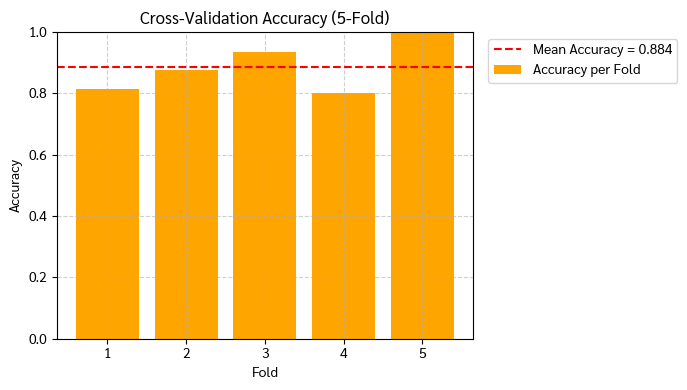

In [207]:
plt.figure(figsize=(7,4))
plt.bar(range(1, len(acc_scores_log)+1), acc_scores_log, label='Accuracy per Fold', color='orange')
plt.axhline(y=acc_scores_log.mean(), color='red', linestyle='--', label=f'Mean Accuracy = {acc_scores_log.mean():.3f}')
plt.title('Cross-Validation Accuracy (5-Fold)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc_scores_log)+1))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # ✅ ย้าย legend ออกไปทางขวา
plt.tight_layout()
plt.show()


In [208]:
acc_scores_log.std()

np.float64(0.07501851623284599)

In [209]:
# หลังจาก fit แล้ว
pipe.fit(X, y)

# ดึง logistic regression ออกมา
logreg = pipe.named_steps["logreg"]

# ค่า weight (importance) ของแต่ละ feature
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg.coef_[0],
    "Abs_Coefficient": np.abs(logreg.coef_[0])
}).sort_values("Abs_Coefficient", ascending=False)

print(importance)


                    Feature  Coefficient  Abs_Coefficient
3     x4_visits_per_elderly    -0.568469         0.568469
2  x3_equipment_per_elderly    -0.504092         0.504092
1   x2_hospital_per_elderly    -0.496456         0.496456
0      x1_staff_per_elderly    -0.484764         0.484764


d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

d:\mini\envs\pine\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## RandomForest

In [216]:
rf = RandomForestClassifier(
    n_estimators=300,  
    max_depth=2,        
    random_state=42,
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores_random = cross_val_score(rf, X, y, cv=cv, scoring="accuracy")

print("Accuracy per fold:", np.round(acc_scores_random, 4))
print("Mean Accuracy:", np.round(acc_scores_random.mean(), 4))

Accuracy per fold: [0.875  0.9375 0.9333 0.9333 0.8667]
Mean Accuracy: 0.9092


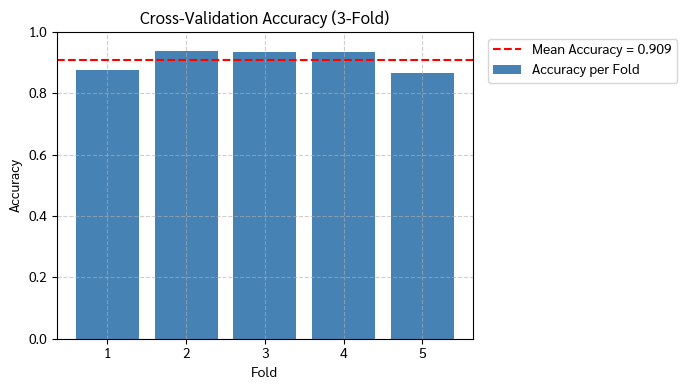

In [217]:
plt.figure(figsize=(7,4))
plt.bar(range(1, len(acc_scores_random)+1), acc_scores_random, label='Accuracy per Fold',color='steelblue')
plt.axhline(y=acc_scores_random.mean(), color='red', linestyle='--', label=f'Mean Accuracy = {acc_scores_random.mean():.3f}')
plt.title('Cross-Validation Accuracy (3-Fold)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(acc_scores_random)+1))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # ✅ ย้าย legend ออกไปทางขวา
plt.tight_layout()
plt.show()

In [218]:
acc_scores_random.std()

np.float64(0.03144660377352201)

## Best model

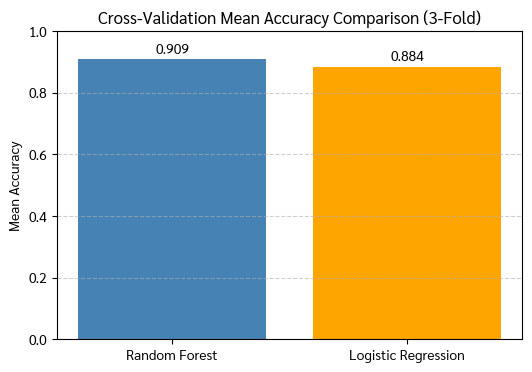

In [219]:
mean_random = acc_scores_random.mean()
mean_log = acc_scores_log.mean()

models = ["Random Forest", "Logistic Regression"]
scores = [mean_random, mean_log]

plt.figure(figsize=(6,4))
bars = plt.bar(models, scores, color=['steelblue', 'orange'])
plt.ylim(0, 1)
plt.ylabel("Mean Accuracy")
plt.title("Cross-Validation Mean Accuracy Comparison (3-Fold)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()



Feature importance:
                     Feature  Importance
3     x4_visits_per_elderly    0.311519
0      x1_staff_per_elderly    0.304999
1   x2_hospital_per_elderly    0.229975
2  x3_equipment_per_elderly    0.153506


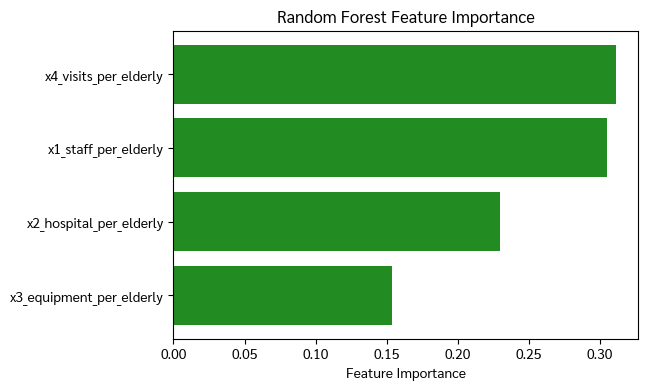

In [220]:
rf.fit(X, y)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nFeature importance:\n", importances)

plt.figure(figsize=(6,4))
plt.barh(importances["Feature"], importances["Importance"], color="forestgreen")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()